In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Linear regression

### Custom

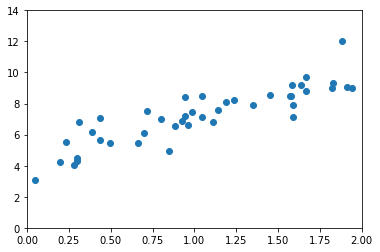

In [ ]:
X = 2 * np.random.randn(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

fig, ax = plt.subplots()

ax.scatter(X, y)
ax.axis([0, 2, 0, 14])


fig.show()

In [ ]:
X_b = np.c_[np.ones((100, 1)), X] # Add x_0 = 1 for all instances (is bias)
thetha_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) # Multiple regression equation
thetha_best

array([[4.01626698],
       [3.01884958]])

In [ ]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(thetha_best)
y_predict

array([[ 4.01626698],
       [10.05396613]])

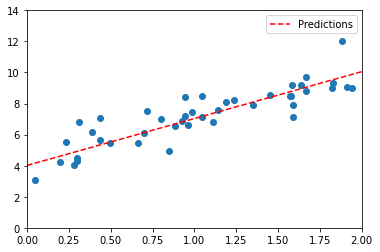

In [ ]:
fig, ax = plt.subplots()

ax.scatter(X, y)
ax.plot(X_new, y_predict, 'r--', label='Predictions')
ax.axis([0, 2, 0, 14])
ax.legend()

fig.show()

### Sci-kit learn

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression().fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.01626698]), array([[3.01884958]]))

In [ ]:
lin_reg.predict(X_new)

array([[ 4.01626698],
       [10.05396613]])

### SciPy

In [ ]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.01626698],
       [3.01884958]])

### Custom 2

In [ ]:
np.linalg.pinv(X_b).dot(y)

array([[4.01626698],
       [3.01884958]])

### Batch Gradient descent

In [ ]:
lr = 0.1
epochs = 1000
m = 100

theta = np.random.randn(2, 1)

for _ in range(epochs):
    gradients = (2/m) * X_b.T.dot(X_b.dot(theta) - y) # Gradient for MSE error
    theta = theta - lr * gradients

theta

array([[4.01626698],
       [3.01884958]])

**Batch Gradient descent plots**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in subtract
  


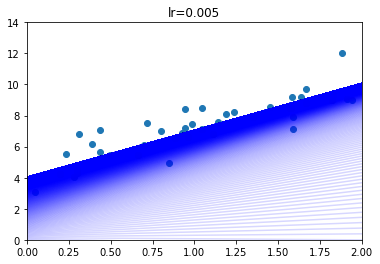

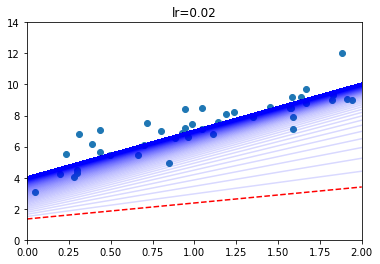

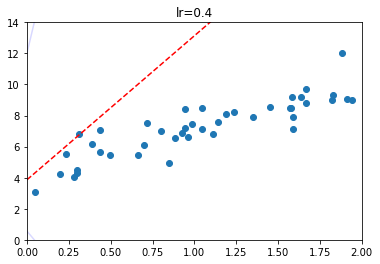

In [ ]:
def bgd(lr=0.1, epochs=10):
    m = 100
    theta = np.random.randn(2, 1)
    thetas = []

    for _ in range(epochs):
        gradients = (2/m) * X_b.T.dot(X_b.dot(theta) - y) # Gradient for MSE error
        theta = theta - lr * gradients
        thetas.append(theta)

    return thetas

def plot_bgd(lr=0.1, epochs=10, color='blue', scatter=True):
    thetas = bgd(lr, epochs)

    plt.title(f'lr={lr}')
    plt.xlim(0, 2)
    plt.ylim(0, 14)
    plt.scatter(X, y)

    for index, theta in enumerate(thetas):
        x_for_pred = np.array([[0], [2]])
        x_for_pred = np.c_[np.ones((2, 1)), x_for_pred]
        y_preds = x_for_pred.dot(theta)

        if index == 0:
            plt.plot(np.array([[0], [2]]), y_preds, 'r--', alpha=1)
        else:
            plt.plot(np.array([[0], [2]]), y_preds, alpha=index/(2*epochs)+0.15, c=color)

plt.figure()
plot_bgd(epochs=1000, lr=0.005)

plt.figure()
plot_bgd(epochs=1000, lr=0.02)

plt.figure()
plot_bgd(epochs=1000, lr=0.4)

### Stochastic Gradient Descent

**Own**

In [ ]:
n_epochs = 50
t0, t1 = 5, 50
theta = np.random.randn(2, 1)
m = X_b.shape[0]

def learning_schedule(t):
    return t0 / (t + t1) # Describes how learning rate goes down

for epoch in range(n_epochs):
    for _ in range(m):
        random_index = np.random.randint(m)

        xi = X_b[random_index: random_index + 1]
        yi = y[random_index: random_index + 1]

        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        lr = learning_schedule(epoch * m + 1)

        theta = theta - lr * gradients

theta

array([[4.02148737],
       [3.00920887]])

**Sci-kit learn**

In [ ]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1).fit(X, y.ravel())

In [ ]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.98888146]), array([3.01898945]))

### Mini-batch Gradient Descent
Takes random mini batches from dataset for every epoch and trains.
```python
from sklearn import SGDRegressor
```

## Polynomial Regression

### Custom

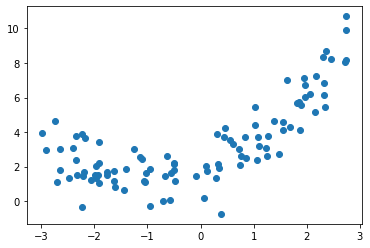

In [2]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

plt.scatter(X, y)
plt.show()

In [3]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [4]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression().fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.7968035]), array([[1.06606058, 0.54614346]]))

#### Experiments

**Correct degree**

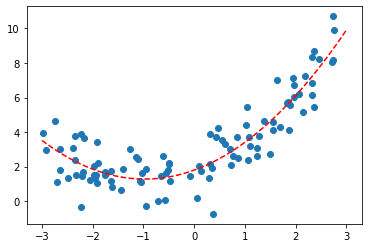

In [5]:
DH_x_labels = np.linspace(-3, 3, 100).reshape(-1, 1)
DH_y_predict = lin_reg.predict(poly_features.transform(DH_x_labels))

plt.plot(DH_x_labels, DH_y_predict, 'r--')
plt.scatter(X, y)

plt.show()

**Multiple degrees**

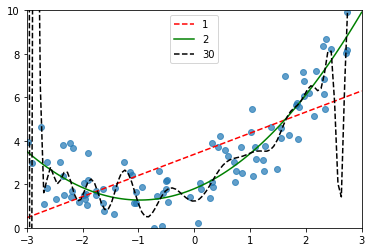

In [10]:
DH_x_labels = np.linspace(-3, 3, 100).reshape(-1, 1)

DH_degress = (1, 2, 30)
DH_styles = ('r--', 'g', 'k--')

for degree, style in zip(DH_degress, DH_styles):
    DH_poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    DH_lin_reg = LinearRegression()

    DH_x_labels_poly = DH_poly_features.fit_transform(X)
    DH_lin_reg.fit(DH_x_labels_poly, y)

    DH_y_predict = DH_lin_reg.predict(DH_poly_features.transform(DH_x_labels))
    plt.plot(DH_x_labels, DH_y_predict, style, label=degree)

plt.scatter(X, y, alpha=0.7)
plt.legend()
plt.xlim(-3, 3)
plt.ylim(0, 10)
plt.show()

### Learning Curves

In [7]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    train_errors, val_errors = [], []

    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])

        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)

        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='train')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='val')
    plt.legend()

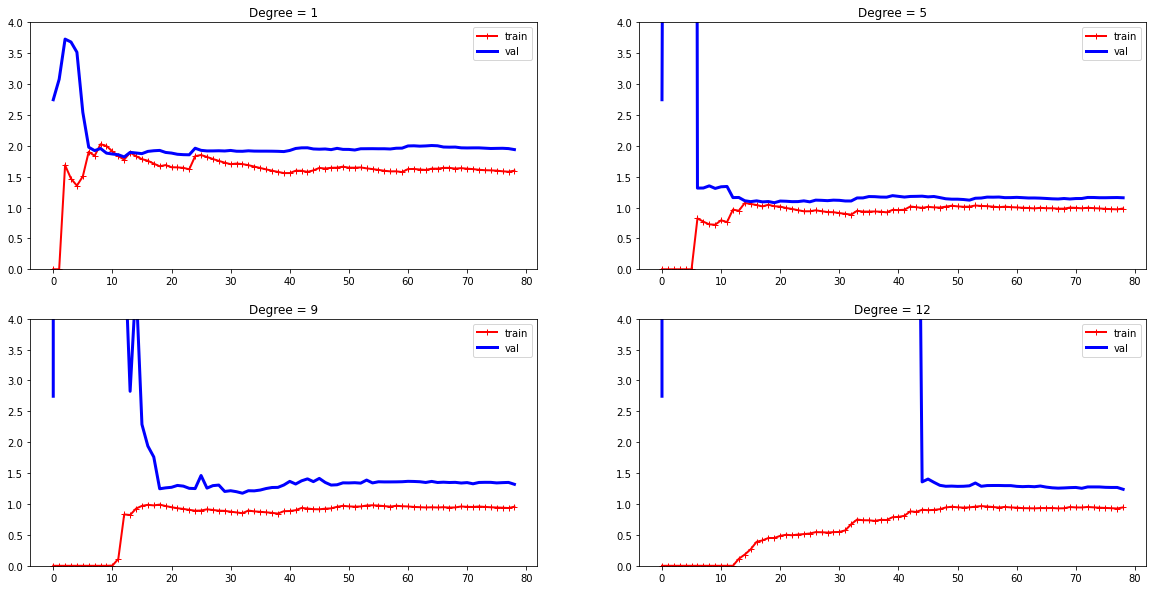

In [12]:
from sklearn.pipeline import Pipeline

plt.figure(figsize=(20, 10))

for position, degree in enumerate((1, 5, 9, 12)):
    plt.subplot(2, 2, position+1)
    plt.title(f'Degree = {degree}')
    plt.ylim(0, 4)

    polynomial_regression = Pipeline([
        ('poly_features', PolynomialFeatures(degree=degree, include_bias=False)),
        ('lin_reg', LinearRegression())
    ])

    plot_learning_curves(polynomial_regression, X, y)

plt.show()

## Regularized Models

In [38]:
def plot_model_preds(model, X=np.linspace(-3, 3, 100).reshape(-1, 1), style='r--', label=None):
    y = model.predict(X)
    plt.plot(X, y, style, label=label)

### Ridge Regression

**Closed-form**

In [25]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver='cholesky').fit(X, y)

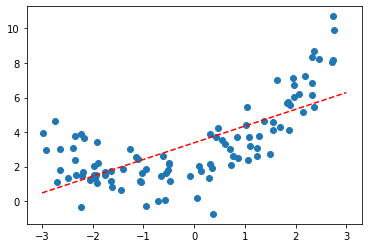

In [34]:
plot_model_preds(ridge_reg)
plt.scatter(X, y)
plt.show()

**Stochastic Gradient Descent**

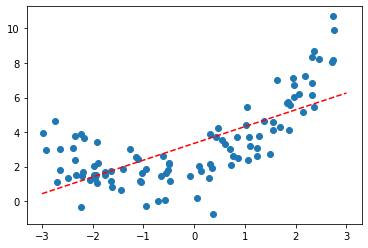

In [35]:
from sklearn.linear_model import SGDRegressor

# Model
sgd_reg = SGDRegressor(penalty='l2').fit(X, y.ravel())


# Plot
plot_model_preds(sgd_reg)
plt.scatter(X, y)

plt.show()

### Lasso Regression

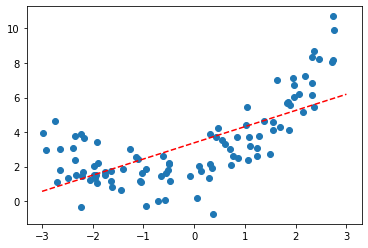

In [36]:
from sklearn.linear_model import Lasso

# Model
lasso_reg = Lasso(alpha=0.1).fit(X, y)

# Plot
plot_model_preds(lasso_reg)
plt.scatter(X, y)

plt.show()

### Elastic Net

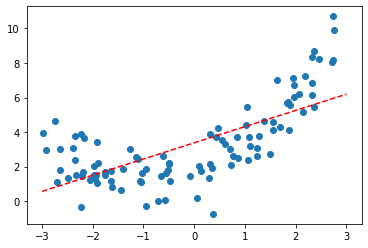

In [37]:
from sklearn.linear_model import ElasticNet

# Model
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5).fit(X, y)

# Plot
plot_model_preds(elastic_net)
plt.scatter(X, y)

plt.show()

**All**

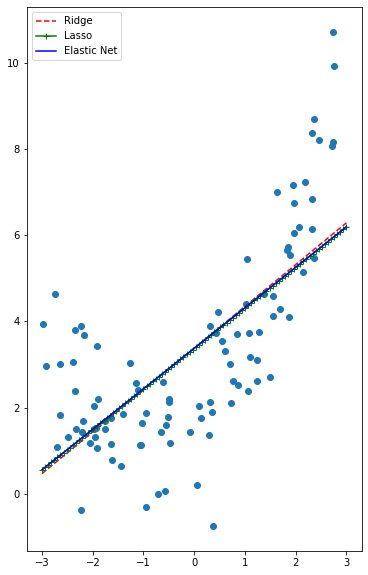

In [43]:
plt.figure(figsize=(6, 10))

plot_model_preds(ridge_reg, label='Ridge', style='r--')
plot_model_preds(lasso_reg, label='Lasso', style='g-+')
plot_model_preds(elastic_net, label='Elastic Net', style='b-')

plt.legend()
plt.scatter(X, y)

plt.show()

### Early Stopping

In [72]:
from sklearn.base import clone
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

poly_scaler = Pipeline([
    ('poly_features', PolynomialFeatures(degree=90, include_bias=False)),
    ('std_scaler', StandardScaler())
])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True, penalty=None, learning_rate='constant', eta0=0.0005, random_state=42)

minimum_val_error = float('inf')
best_epoch = None
best_model = None
train_errors = []
val_errors = []

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train.ravel())

    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)

    train_error = mean_squared_error(y_train, y_train_predict.ravel())
    val_error = mean_squared_error(y_val, y_val_predict.ravel())

    train_errors.append(train_error)
    val_errors.append(val_error)

    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

## Logistic Regression

In [20]:
from sklearn import datasets
iris = datasets.load_iris()

list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [21]:
X = iris['data'][:, 3:] # Petal width
y = (iris['target'] == 2).astype(np.int) # 1 If is Iris Virginica, else 0

### Sci-kit learn (Logistic)

In [22]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression().fit(X, y)

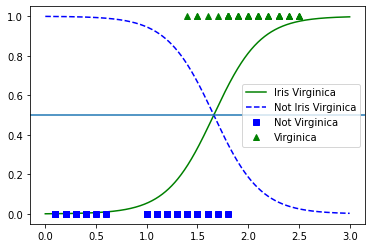

In [23]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], 'g-', label='Iris Virginica')
plt.plot(X_new, y_proba[:, 0], 'b--', label='Not Iris Virginica')

plt.plot(X[y == 0], y[y == 0], 'bs', label='Not Virginica')
plt.plot(X[y == 1], y[y == 1], 'g^', label='Virginica')

plt.axhline(0.5)

plt.legend()
plt.show()

### Sci-kit learn (softmax regression)

In [24]:
from sklearn.linear_model import LogisticRegression

X = iris['data'][:, (2, 3)]
y = iris['target']

softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10).fit(X, y)

In [25]:
print(softmax_reg.predict([[5, 2]]))
print(softmax_reg.predict_proba([[5, 2]])) # Probability for every class

[2]
[[6.38014896e-07 5.74929995e-02 9.42506362e-01]]


**Plot**

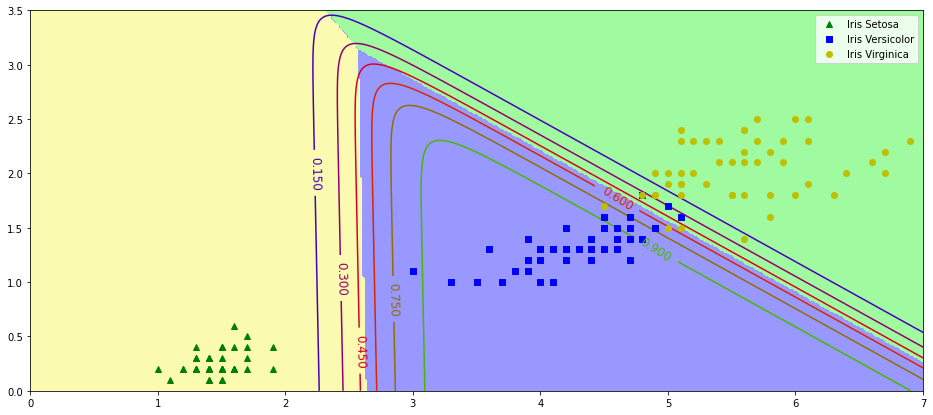

In [43]:
from matplotlib import cm
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

x0, x1 = np.meshgrid(
    np.linspace(0, 8, 500),
    np.linspace(0, 3.5, 200)
)

X_new = np.c_[x0.ravel(), x1.ravel()]
X_new_proba = softmax_reg.predict_proba(X_new)
X_new_proba = X_new_proba[:, 1].reshape(x0.shape)
X_new_predict = softmax_reg.predict(X_new).reshape(x0.shape)

plt.figure(figsize=(16, 7))

plt.contourf(x0, x1, X_new_predict, cmap=custom_cmap)
contour = plt.contour(x0, x1, X_new_proba, cmap=cm.brg)
plt.clabel(contour, inline=True, fontsize=12)

plt.plot(X[y==0, 0], X[y==0, 1], 'g^', label='Iris Setosa')
plt.plot(X[y==1, 0], X[y==1, 1], 'bs', label='Iris Versicolor')
plt.plot(X[y==2, 0], X[y==2, 1], 'yo', label='Iris Virginica')

plt.legend()
plt.axis([0, 7, 0, 3.5])
plt.show()